## NDVI

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np, numpy.ma as ma

In [10]:
# Import GOES ABI Channel 3

fname = '../data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C03_G16_s20192091147504_e20192091147562_c20192091148025.nc'
goesnc = Dataset(fname)
veggie = goesnc.variables['Rad'][:]

In [11]:
# Import GOES ABI Channel 2

fname = '../data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C02_G16_s20192091147504_e20192091147562_c20192091147599.nc'
goesnc = Dataset(fname)
red = goesnc.variables['Rad'][:]

In [12]:
veggie.shape, red.shape

((1000, 1000), (2000, 2000))

In [13]:
red = red[::2, ::2]

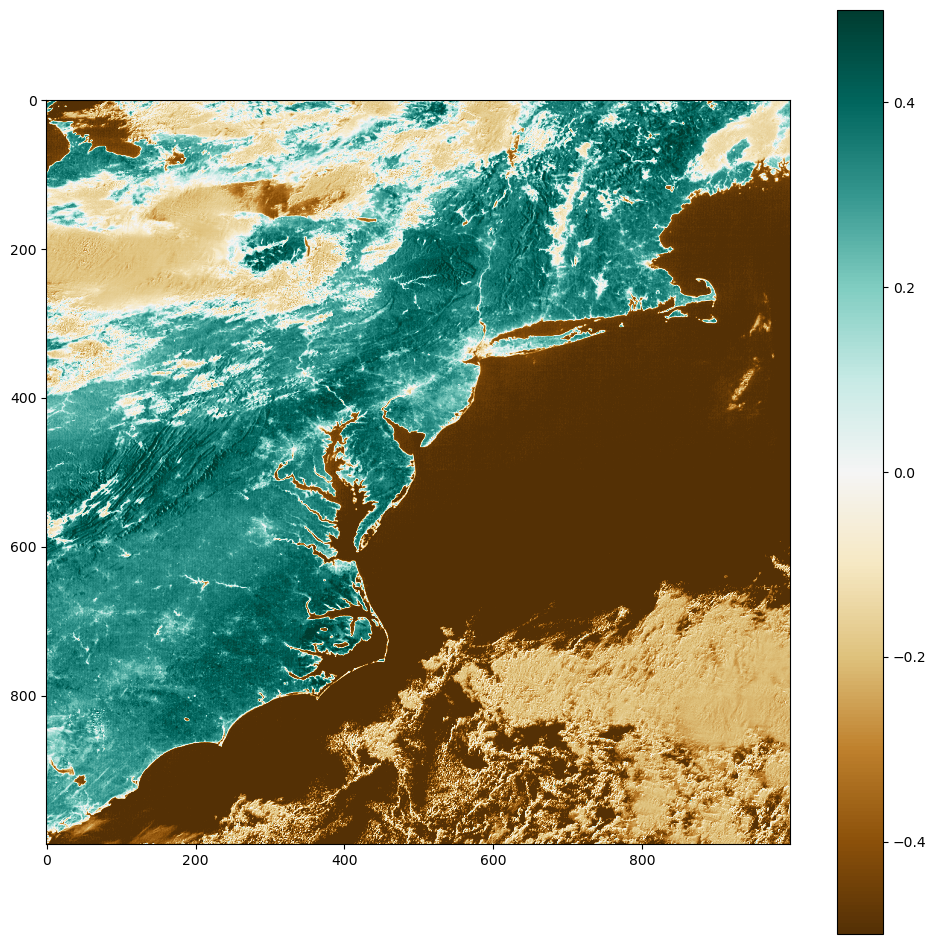

In [15]:
img = (veggie - red) / (veggie + red)

plt.figure(figsize=[12, 12])
plt.imshow(img, vmin=-0.5, vmax=0.5, cmap = plt.get_cmap("BrBG"))
plt.colorbar()
plt.show()

In [16]:
fname = '../data/goes-meso/ndvi/OR_ABI-L2-ACMM1-M6_G16_s20192091147504_e20192091147562_c20192091148155.nc'
goesnc = Dataset(fname, 'r')
cloud_mask = goesnc.variables['BCM'][:]

In [17]:
cloud_mask_big = np.repeat(np.repeat(cloud_mask, 2, axis=1), 2, axis=0)

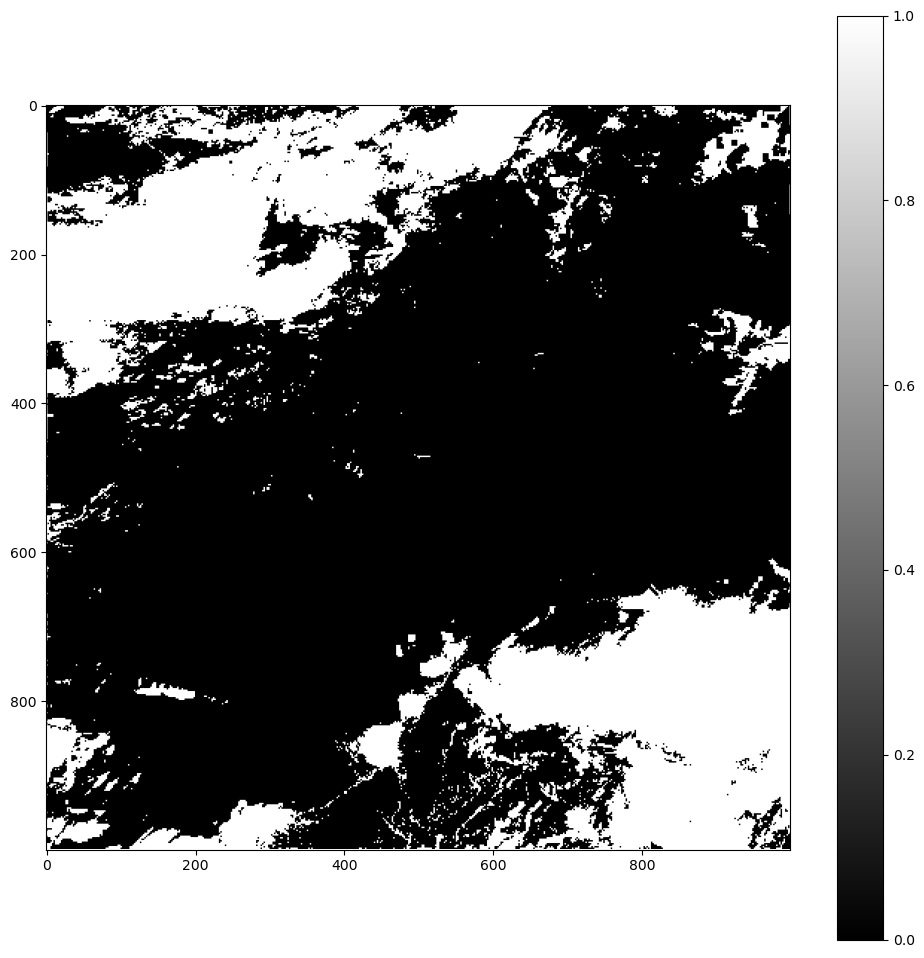

In [18]:
plt.figure(figsize=[12, 12])
plt.imshow(cloud_mask_big, cmap=plt.get_cmap("binary_r"))
plt.colorbar()
plt.show()

In [19]:
imgMasked = ma.masked_array(img, mask=cloud_mask_big, fill_value=np.nan)

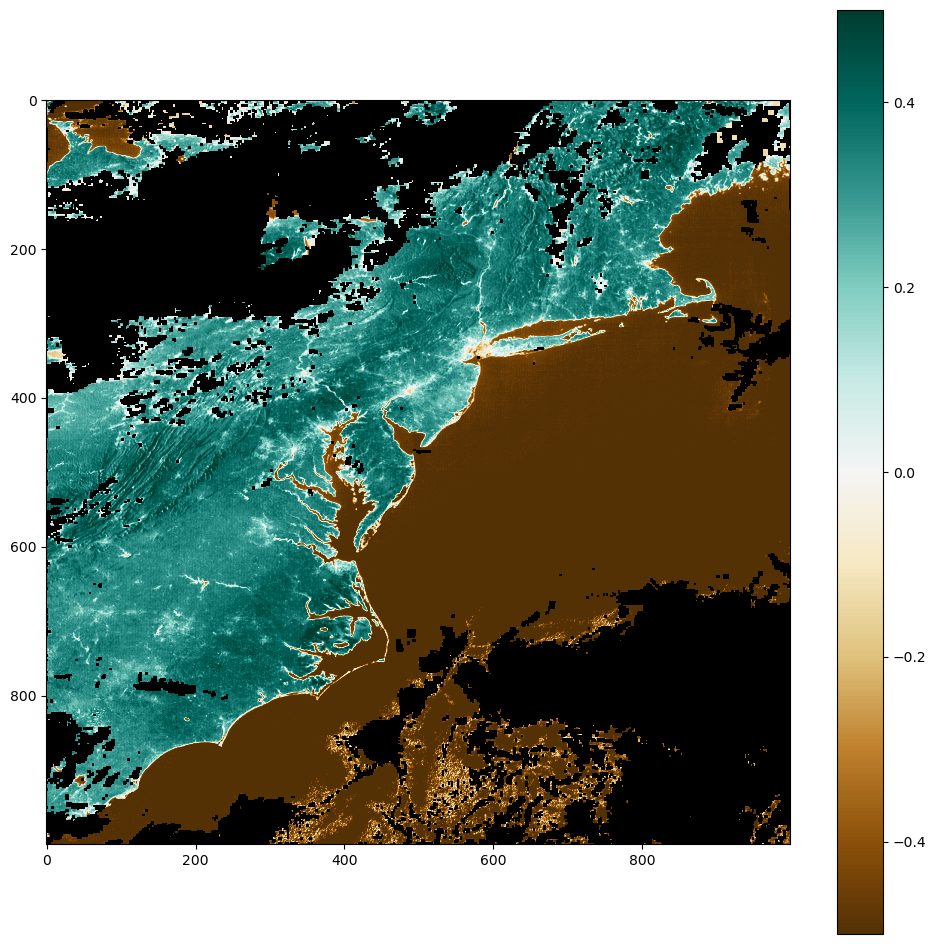

In [20]:
plt.figure(figsize=[12, 12])
plt.imshow(ma.filled(imgMasked), vmin=-0.5, vmax=0.5, cmap=plt.get_cmap("BrBG"))
plt.gca().set_facecolor("black")

plt.colorbar()
plt.show()